In [1]:
pip install kagglehub

Note: you may need to restart the kernel to use updated packages.


## 1. Importing Libraries & Loading Dataset


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import kagglehub
from sklearn.preprocessing import FunctionTransformer

## 2. Downloading and Reading Dataset


In [3]:
path = kagglehub.dataset_download("camnugent/california-housing-prices")


In [4]:
csv_path = path + "/housing.csv"
df = pd.read_csv(csv_path)

## 3. Exploratory Data Analysis (EDA)


In [5]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
df.shape

(20640, 10)

In [7]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

## 4. Data Cleaning & Handling Missing Values


In [8]:
df['total_bedrooms'].fillna(df['total_bedrooms'].mean() , inplace = True)

C:\Users\Hp\AppData\Local\Temp\ipykernel_20084\3606862320.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['total_bedrooms'].fillna(df['total_bedrooms'].mean() , inplace = True)


In [9]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.266592,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,438.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [10]:
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [11]:
from sklearn.preprocessing import LabelEncoder

## 6. Feature Engineering


In [12]:
le = LabelEncoder()
df['ocean_proximity'] = le.fit_transform(df['ocean_proximity'])

In [13]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3


<Axes: xlabel='longitude'>

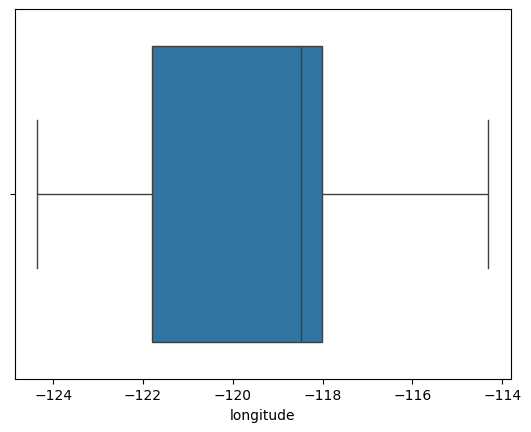

In [14]:
sns.boxplot(x = df['longitude'])

In [15]:
ft = FunctionTransformer(func = np.log1p)

In [16]:
 df['total_rooms'] = ft.fit_transform( df['total_rooms'])
 df['total_bedrooms'] = ft.fit_transform( df['total_bedrooms'])
 df['population'] = ft.fit_transform( df['population'])
 df['households'] = ft.fit_transform( df['households'])
 df['median_income'] = ft.fit_transform( df['median_income'])
 df['median_house_value'] = ft.fit_transform( df['median_house_value'])

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
ss = StandardScaler()

In [19]:
 df['total_rooms'] = ss.fit_transform( df[['total_rooms']])
 df['total_bedrooms'] = ss.fit_transform( df[['total_bedrooms']])
 df['population'] = ss.fit_transform( df[['population']])
 df['households'] = ss.fit_transform( df[['households']])
 df['median_income'] = ss.fit_transform( df[['median_income']])
 df['latitude'] = ss.fit_transform( df[['latitude']])
 df['housing_median_age'] = ss.fit_transform( df[['housing_median_age']])
df['longitude'] = ss.fit_transform( df[['longitude']])

In [20]:
df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-1.327835,1.052548,0.982143,-1.131133,-1.644278,-1.694943,-1.569395,1.995505,13.022766,3
1,-1.322844,1.043185,-0.607019,1.651357,1.316422,1.030337,1.449251,1.988380,12.789687,3
2,-1.332827,1.038503,1.856182,-0.450310,-1.112456,-1.109604,-1.104849,1.656444,12.771673,3
3,-1.337818,1.038503,1.856182,-0.638257,-0.820020,-0.949925,-0.813343,1.049948,12.740520,3
4,-1.337818,1.038503,1.856182,-0.312370,-0.578778,-0.933021,-0.583469,0.170631,12.743154,3
5,-1.337818,1.038503,1.856182,-1.073376,-0.955285,-1.357797,-0.986406,0.278184,12.505069,3
6,-1.337818,1.033821,1.856182,0.278632,0.189848,-0.036664,0.357034,0.060856,12.608871,3
7,-1.337818,1.033821,1.856182,0.548543,0.658976,0.039318,0.673143,-0.281992,12.394215,3
8,-1.342809,1.033821,1.061601,0.289106,0.614052,0.095611,0.558037,-1.092751,12.331387,3
9,-1.337818,1.033821,1.856182,0.727128,0.698586,0.437094,0.808534,0.080000,12.472663,3


## 5. Data Visualization


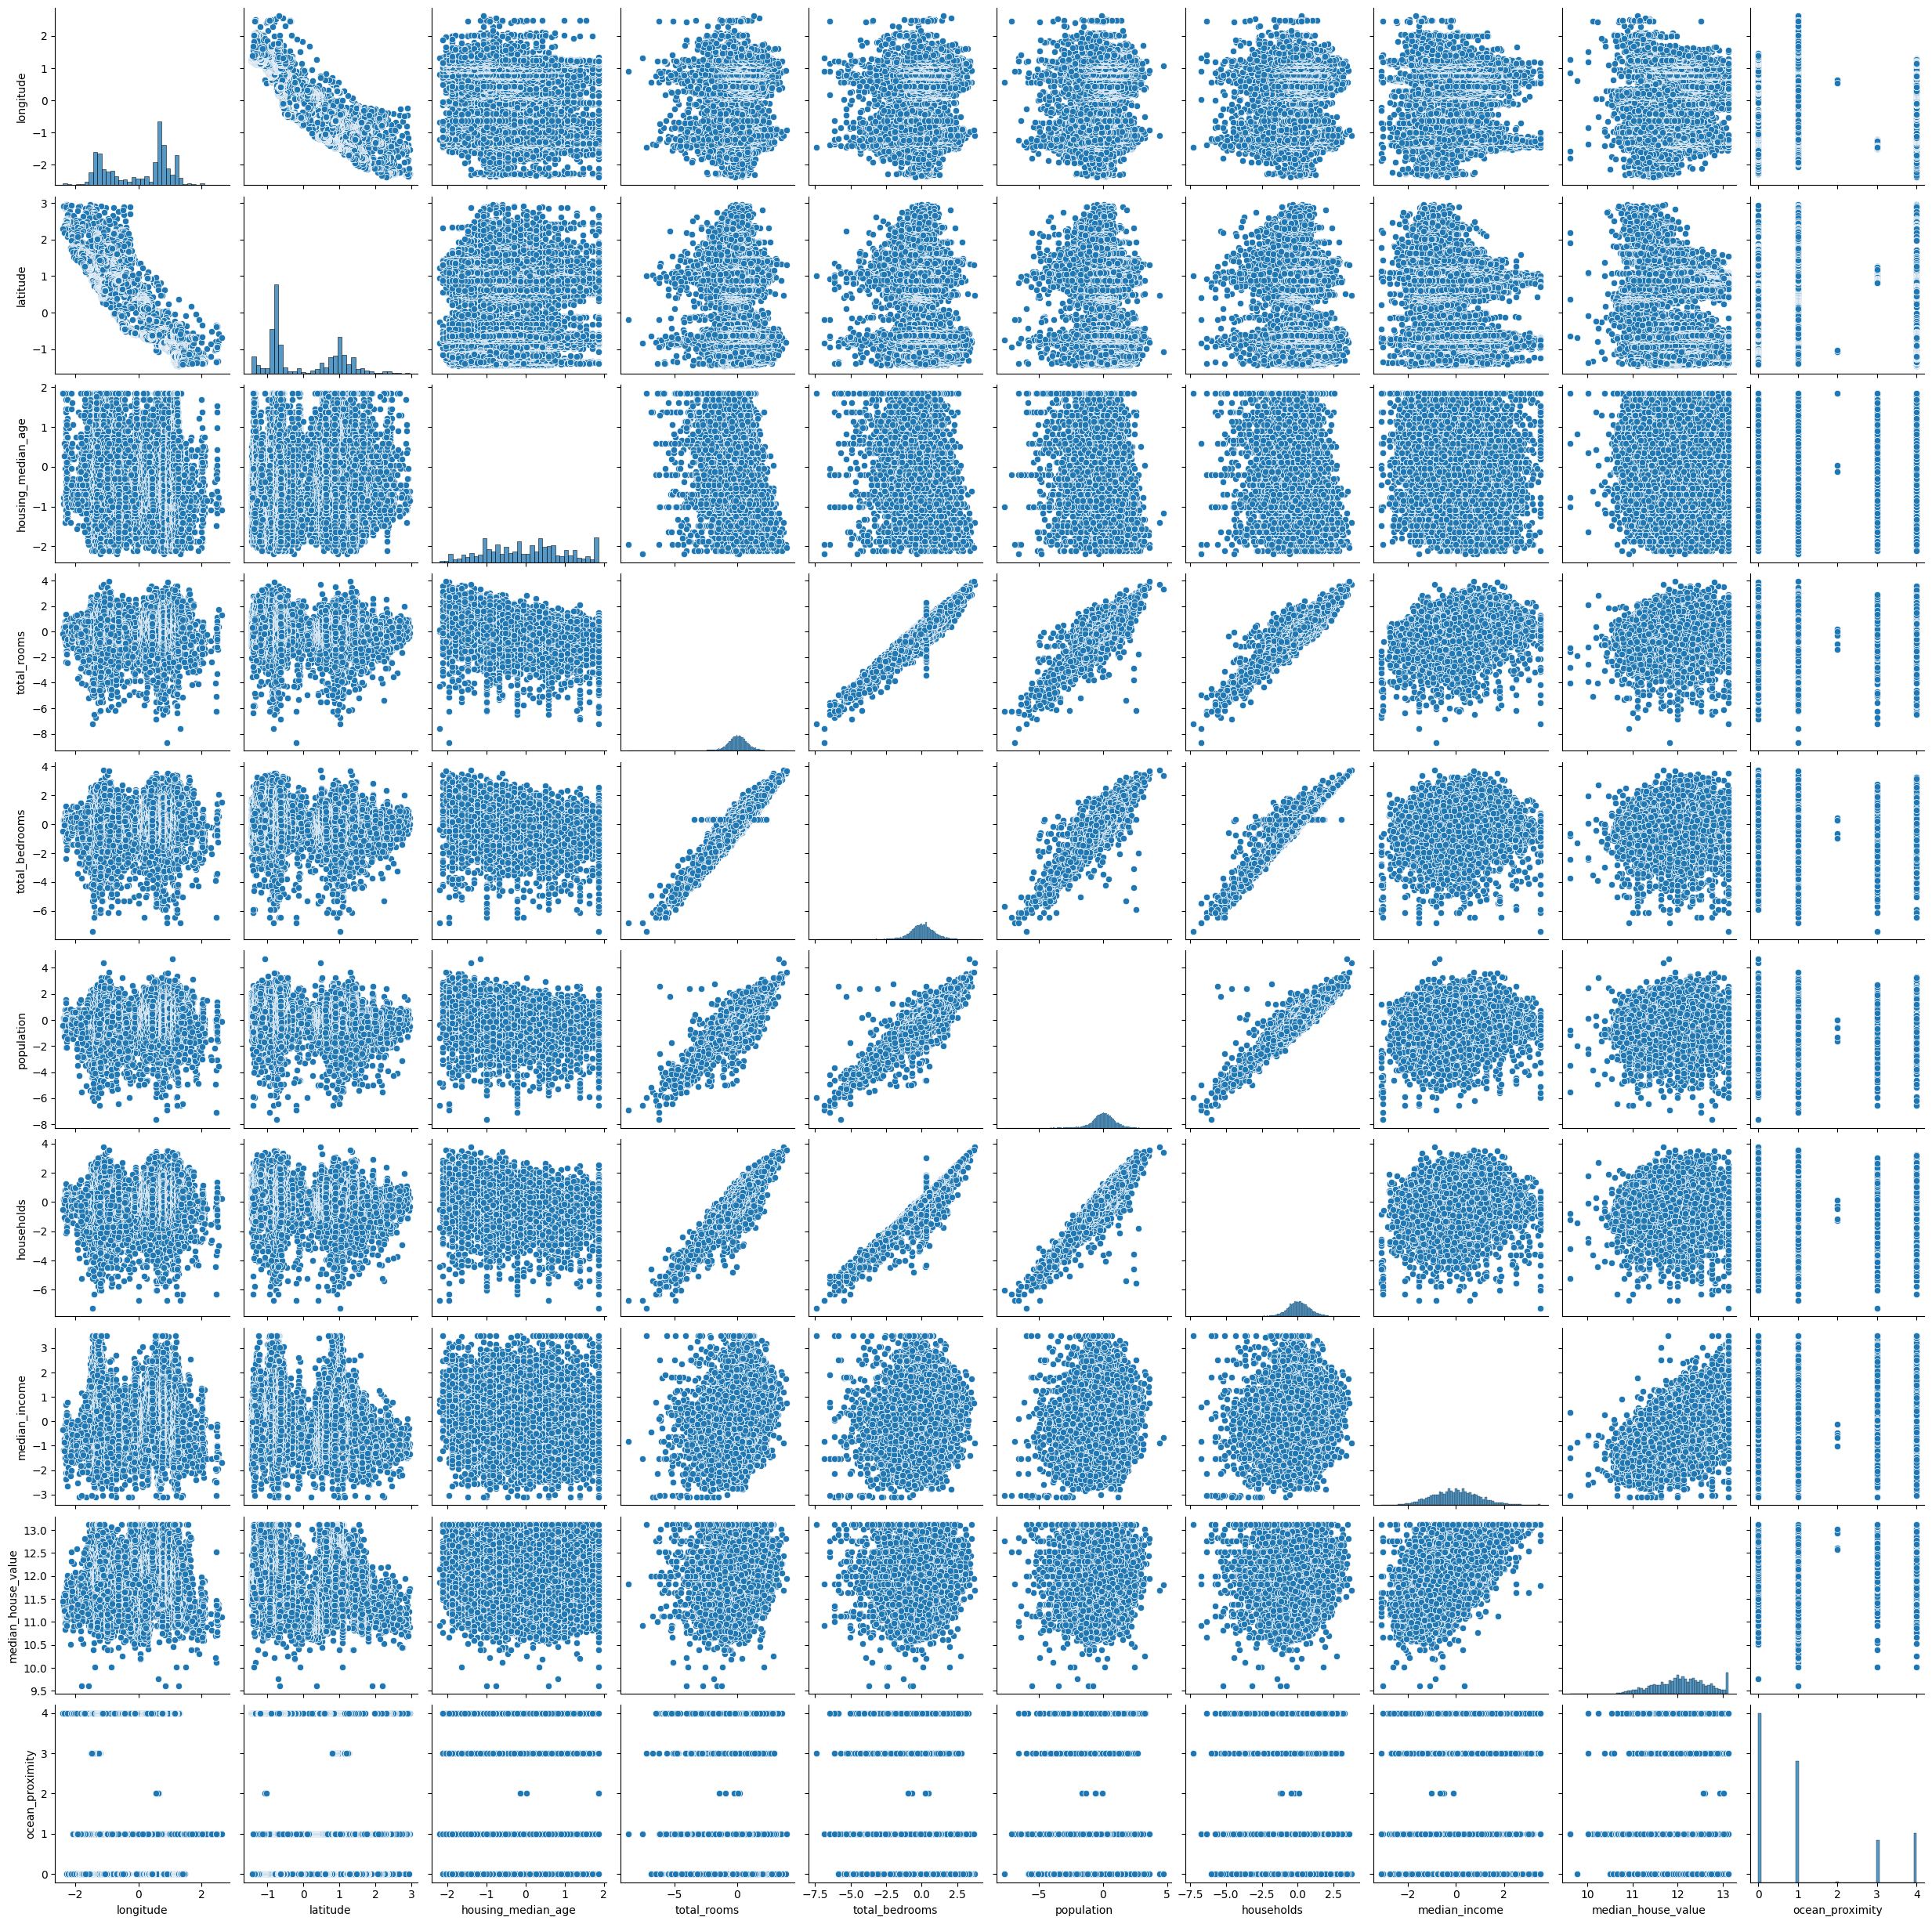

In [21]:
sns.pairplot(df)

##  Feature Engineering


In [22]:
x = df.drop('median_house_value' , axis = 1)
y = df['median_house_value']

In [23]:
from sklearn.preprocessing import PolynomialFeatures

In [24]:
pf = PolynomialFeatures(degree = 2)
pf.fit(x)
x = pd.DataFrame( pf.transform(x))

## 7. Model Building using Linear Regression


In [25]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.30, random_state = 19)

In [26]:
lr = LinearRegression()

In [27]:
lr.fit(x_train , y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [28]:
lr.score(x_test , y_test)*100

74.67358706282812

In [29]:
from mlxtend.feature_selection import SequentialFeatureSelector

In [30]:
sfs = SequentialFeatureSelector(lr , k_features = 30 , forward = True)

In [31]:
sfs.fit(x_train , y_train)

,estimator,LinearRegression()
,k_features,"(30, ...)"
,forward,True
,floating,False
,verbose,0
,scoring,'r2'
,cv,5
,n_jobs,1
,pre_dispatch,'2*n_jobs'
,clone_estimator,True
,fixed_features,None


In [32]:
sfs.k_score_*100     #SFS gives low accuracy then Org 

np.float64(72.96262967354713)

In [33]:
predicted_data = pd.DataFrame(lr.predict(x_test))

In [34]:
predicted_data

,0
0,12.427563
1,11.207126
2,12.215511
3,12.326900
4,12.959926
...,...
6187,11.869132
6188,12.317541
6189,12.613497
6190,12.672555


In [35]:
df.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-1.327835,1.052548,0.982143,-1.131133,-1.644278,-1.694943,-1.569395,1.995505,13.022766,3
1,-1.322844,1.043185,-0.607019,1.651357,1.316422,1.030337,1.449251,1.988380,12.789687,3
2,-1.332827,1.038503,1.856182,-0.450310,-1.112456,-1.109604,-1.104849,1.656444,12.771673,3
3,-1.337818,1.038503,1.856182,-0.638257,-0.820020,-0.949925,-0.813343,1.049948,12.740520,3
4,-1.337818,1.038503,1.856182,-0.312370,-0.578778,-0.933021,-0.583469,0.170631,12.743154,3


In [36]:
lr.predict(x)

array([12.83956962, 13.07351965, 12.8337954 , ..., 11.20412411,
       11.30185565, 11.34989857], shape=(20640,))

## 8. Predicting House Price for New Data


In [37]:
new_home = pd.DataFrame({
    'longitude': [-118.5],
    'latitude': [34.2],
    'housing_median_age': [29],
    'total_rooms': [2200],
    'total_bedrooms': [430],
    'population': [1050],
    'households': [400],
    'median_income': [5.2],
    'ocean_proximity': ['INLAND']
})


In [38]:
new_home

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-118.5,34.2,29,2200,430,1050,400,5.2,INLAND


In [39]:
new_home['ocean_proximity'] = le.fit_transform(new_home['ocean_proximity']) 

In [40]:
cols = ['total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']

In [41]:
for col in cols:
    new_home[col] = np.log1p(new_home[col])

In [42]:
new_home['longitude'] = ss.fit_transform(new_home[['longitude']])
new_home['latitude'] = ss.fit_transform(new_home[['latitude']])
new_home['housing_median_age'] = ss.fit_transform(new_home[['housing_median_age']])
new_home['total_rooms'] = ss.fit_transform(new_home[['total_rooms']])
new_home['total_bedrooms'] = ss.fit_transform(new_home[['total_bedrooms']])
new_home['population'] = ss.fit_transform(new_home[['population']])
new_home['households'] = ss.fit_transform(new_home[['households']])
new_home['median_income'] = ss.fit_transform(new_home[['median_income']])

In [43]:
new_home

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [44]:
new_home_poly = pf.transform(new_home)


In [45]:
prd = lr.predict(new_home_poly)

In [46]:
prd

array([12.05977712])

In [47]:
predicted_log_price = lr.predict(new_home_poly)
predicted_price = np.expm1(predicted_log_price)  # Reverse log
print("Predicted House Price:", predicted_price[0])


Predicted House Price: 172779.47261312677


## 10. Conclusion


- Linear Regression model trained on California Housing Dataset
- Polynomial Features and log transforms were applied for better performance
- Achieved **74.67% R² score** on test data
- Model can predict house price based on features like location, income, rooms, etc.
- Ready to apply on new incoming housing data
